In [ ]:
from keras.layers import LSTM, Dense, RepeatVector, Conv2D, MaxPooling2D, Input, BatchNormalization, Flatten, Reshape
import keras
from keras import callbacks 
from keras.models import Model
from keras.optimizers import adam,sgd
import numpy as np
import h5py
from keras.utils import plot_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
def prediction_network(width, height, depth, hidden_layer = 2048, weightsPath=None):
    
    bn_flag = True
    inputs_to_vgg = Input((width, height , depth))
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs_to_vgg)
    conv1 = BatchNormalization(axis = -1)(conv1,training=bn_flag)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization(axis= -1)(conv1,training=bn_flag)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    ##
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs_to_vgg)
    conv1 = BatchNormalization(axis = -1)(conv1,training=bn_flag)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization(axis= -1)(conv1,training=bn_flag)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    ##
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization(axis = -1)(conv2,training=bn_flag)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization(axis= -1)(conv2,training=bn_flag)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    ##
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization(axis = -1)(conv3,training=bn_flag)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization(axis = -1)(conv3,training=bn_flag)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization(axis = -1)(conv3,training=bn_flag)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    ##
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization(axis = -1)(conv4,training=bn_flag)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization(axis = -1)(conv4,training=bn_flag)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization(axis = -1)(conv4,training=bn_flag)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    ##
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization(axis = -1)(conv5,training=bn_flag)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization(axis = -1)(conv5,training=bn_flag)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization(axis = -1)(conv5,training=bn_flag)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)
    ##
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool5)
    conv6 = BatchNormalization(axis = -1)(conv6,training=bn_flag)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization(axis = -1)(conv6,training=bn_flag)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization(axis = -1)(conv6,training=bn_flag)
    pool6 = MaxPooling2D(pool_size=(2, 2))(conv6)
    Y = Flatten()(pool6)
    Y = Dense(hidden_layer, activation='relu')(Y)
    Y = Dense(hidden_layer, activation='relu')(Y)
    Y = Dense(hidden_layer, activation='relu')(Y)
    Y = Reshape((hidden_layer, ))(Y)

    ####################################################################################################
    # Y is the output from the VGG network. 
  
    L = RepeatVector(64)(Y)
    L = LSTM(1618 , return_sequences = True, activation = 'softmax' )(L)
    # out = TimeDistributed(Dense(1618, activation = 'softmax'))(L)
  

    model = Model(inputs=inputs_to_vgg, outputs=[L])
  
    if weightsPath is not None:
        model.load_weights(weightsPath)
    
    print(model.summary())
    return model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
dest_filepath = 'gdrive/My Drive/Colab Notebooks/Project/chest_xray_dataset2_report.hdf5'
dest_filepath1 = 'gdrive/My Drive/Colab Notebooks/Project/chest_xray_dataset2_report_one_hot.hdf5'

In [ ]:
model = prediction_network(width = 512, height = 512, depth = 1)












Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 512, 512, 64)      640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 512, 512, 64)      256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 512, 512, 64)      36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 512, 512, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 256, 256, 12

In [ ]:
#weightsPath='gdrive/My Drive/Project_Code/chest_xray_report_model_one_hot3.h5'
path2save = 'gdrive/My Drive/Project_Code/chest_xray_report_model_one_hot.h5'
modelCheck = callbacks.ModelCheckpoint(path2save, monitor='loss', verbose=1, mode='auto') 
opt = adam(lr=1e-5)
#Set the compiler parameter for the training
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["categorical_accuracy"],sample_weight_mode='auto')
print ("Training the Model...")



Training the Model...


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3003 samples, validate on 334 samples
Epoch 1/12
3003/3003 [==============================] - 1264s 421ms/step - loss: 3.5687 - categorical_accuracy: 0.4975 - val_loss: 3.2770 - val_categorical_accuracy: 0.5150

Epoch 00001: saving model to gdrive/My Drive/Project_Code/chest_xray_report_model_one_hot.h5
Epoch 2/12
3003/3003 [==============================] - 1251s 417ms/step - loss: 3.1721 - categorical_accuracy: 0.5130 - val_loss: 3.1120 - val_categorical_accuracy: 0.5150

Epoch 00002: saving model to gdrive/My Drive/Project_Code/chest_xray_report_model_one_hot.h5
Epoch 3/12
3003/3003 [==============================] - 1258s 419ms/step - loss: 3.0907 - categorical_accuracy: 0.5135 - val_loss: 3.1106 - val_categorical_accuracy: 0.5150

Epoch 00003: saving model to gdrive/My Drive/Project_Code/chest_xray_report_model_one_hot.h5
Epoch 4/12
3003/3003 [==============================] - 

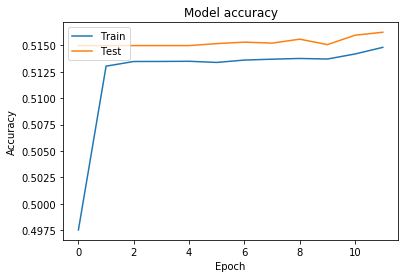

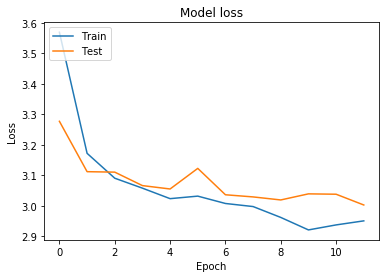

In [ ]:
with h5py.File(dest_filepath, 'r') as f: 
    X_images = f['input_data']
    with h5py.File(dest_filepath1, 'r') as g:
      Y = g['report_one_hot']
      history = model.fit(X_images , Y, batch_size=4, epochs=12, verbose=1, callbacks= [modelCheck], shuffle="batch", validation_split=0.1)
      print ("Dumping Weights to file...")
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show() 